## Data Overview

In [21]:
import pandas as pd

df = pd.read_csv('Secondary.csv')

for column in df.columns:
    print(f"Column Name: {column}")
    print(f"Data Type: {df[column].dtype}")
    print("Unique Values:")
    print(df[column].unique()) 
    print("-" * 50)  


Column Name: 1. What is your age?
Data Type: int64
Unique Values:
[21 22 20 24 23 25 28 34 26 35 18 19 56 65 17 40 33 55 27 14 38 32 30 16
 48 47 50 49 51 46 36 37 45 42 31 15 29 43 52 44 60 13 53]
--------------------------------------------------
Column Name: 2. Gender
Data Type: int64
Unique Values:
[0 1]
--------------------------------------------------
Column Name: 3. Relationship Status
Data Type: int64
Unique Values:
[1 3 2 0]
--------------------------------------------------
Column Name: 4. Occupation Status
Data Type: int64
Unique Values:
[3 2 1 0]
--------------------------------------------------
Column Name: 6. Do you use social media?
Data Type: int64
Unique Values:
[1 0]
--------------------------------------------------
Column Name: 8. What is the average time you spend on social media every day?
Data Type: float64
Unique Values:
[2.5 5.5 3.5 0.5 1.5 4.5]
--------------------------------------------------
Column Name: 9. How often do you find yourself using Social medi

In [22]:
df.shape

(473, 32)

## Working on models

### 1.loading libraries and dataset

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data_path = "Secondary.csv"
data = pd.read_csv(data_path)

### 2. Apply Z-Score normalization to specific columns

In [24]:
columns_to_normalize = [
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
    '17. How often do you look to seek validation from features of social media?',
    '11. Do you feel restless if you haven\'t used Social media in a while?',
    '13. On a scale of 1 to 5, how much are you bothered by worries?',
    '18. How often do you feel depressed or down?',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?',
    '9. How often do you find yourself using Social media without a specific purpose?',
    '10. How often do you get distracted by Social media when you are busy doing something?',
    '12. On a scale of 1 to 5, how easily distracted are you?',
    '14. Do you find it difficult to concentrate on things?'
]


scaler = StandardScaler()
ScalerData=data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
print(ScalerData)

[[-0.5859966   0.21476247 -0.36034645 ... -0.23779354  1.41548136
   1.31000097]
 [ 1.5461295  -1.68397863 -1.1681373  ... -0.23779354  0.56475368
   0.56792856]
 [ 0.1247121   0.21476247 -1.1681373  ... -0.99266835 -1.13670168
   0.56792856]
 ...
 [ 0.1247121   0.21476247  1.25523526 ... -0.23779354 -0.285974
  -0.17414384]
 [-0.5859966   0.21476247  1.25523526 ... -0.23779354 -0.285974
  -0.91621624]
 [ 0.1247121   0.21476247 -0.36034645 ... -0.23779354 -0.285974
  -1.65828865]]


In [25]:

print(data[columns_to_normalize].describe())


       15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?  \
count                                       4.730000e+02                                                                      
mean                                       -1.502205e-17                                                                      
std                                         1.001059e+00                                                                      
min                                        -1.296705e+00                                                                      
25%                                        -5.859966e-01                                                                      
50%                                         1.247121e-01                                                                      
75%                                         8.354208e-01                                                       

The dependent data (Does the number of likes or comments..., etc.) came from survey questions with values ranging from 1 to 5.<br>
To ensure uniform scaling and to remove bias from varying ranges, Z-Score Normalization was applied.<br>
Z-Score standardizes the data such that:<br>
Mean = 0<br>
Standard Deviation = 1<br>
This makes the data more suitable for regression models,<br> especially linear regression.<br>

The StandardScaler from sklearn was used to transform the dependent data into Z-Scores.<br>
Columns normalized include self-esteem-related questions,<br>
social anxiety, insomnia, FOMO, and attention span.<br>

### 3. HMI calculation



| **Factor**                | **Weight** | **Brain Regions**                                                                                          | **Cognitive Processes**                                                                                                                | **Impact on Mental Health**                                      | **Associated Questions**                                                                                                                                                                                                                                                                                                     |
|---------------------------|------------|----------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Self-Esteem**           | **35%**    | **Prefrontal Cortex (PFC)**: Self-evaluation, decision-making.                                           | Self-reflection: Reduced self-esteem affects positive reinforcement. Emotional regulation: Low self-esteem leads to emotional challenges. | High self-esteem protects against anxiety and depression.        | - "On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?"  <br> - "Following the previous question, how do you feel about these comparisons, generally speaking?"  <br> - "How often do you look to seek validation from features of social media?"                                                                        |
|                           |            | **Cingulate Cortex**: Emotion regulation, self-awareness.                                                |                                                                                                                                         | Studies link low self-esteem to withdrawal and emotional issues. |                                                                                                                                                                                                                                                                                                                             |
| **Social Anxiety**         | **25%**    | **Amygdala**: Detects social threats, increases fear.                                                    | Emotional response regulation: Amplifies avoidance behaviors. Memory and focus: Reduces focus in social situations.                     | Increases stress, isolation, and risks of depression.            | - "Do you feel restless if you haven't used social media in a while?"  <br> - "On a scale of 1 to 5, how much are you bothered by worries?"  <br> - "How often do you feel depressed or down?"                                                                                                                                                        |
|                           |            | **Insular Cortex**: Awareness of self and social anxiety.                                                |                                                                                                                                         |                                                                  |                                                                                                                                                                                                                                                                                                                             |
| **Insomnia**               | **20%**    | **Hypothalamus**: Regulates sleep-wake cycles.                                                           | Focus and decision-making: Sleep deprivation reduces cognitive efficiency. Emotional regulation: Worsens emotional instability.         | Chronic insomnia is linked to anxiety, depression, and memory issues. | - "On a scale of 1 to 5, how often do you face issues regarding sleep?"                                                                                                                                                                                                                                                                                                              |
|                           |            | **Hippocampus**: Impacts emotional memory during sleep deprivation.                                       |                                                                                                                                         |                                                                  |                                                                                                                                                                                                                                                                                                                             |
| **Fear of Missing Out (FOMO)** | **15%**    | **Nucleus Accumbens**: Activates reward systems from social media updates.                              | Addictive behavior: FOMO leads to compulsive habits. Social comparison: Chronic exposure to idealized content increases stress.         | Contributes to anxiety and stress but with moderate effects.     | - "How often do you find yourself using social media without a specific purpose?"                                                                                                                                                                                                                                                                                  |
|                           |            | **Anterior Cingulate Cortex (ACC)**: Processes feelings of exclusion or missing out.                     |                                                                                                                                         |                                                                  |                                                                                                                                                                                                                                                                                                                             |
| **Shorter Attention Span** | **5%**     | **Prefrontal Cortex (PFC)**: Essential for sustained attention.                                          | Sustained attention: Shortened attention spans lower productivity. Multitasking: Frequent content shifts weaken focus.                  | Indirect impact, contributes to frustration and life dissatisfaction. | - "How often do you get distracted by social media when you are busy doing something?"  <br> - "On a scale of 1 to 5, how easily distracted are you?"  <br> - "Do you find it difficult to concentrate on things?"                                                                                  |
|                           |            | **Default Mode Network (DMN)**: Disrupted by frequent interruptions.                                    |                                                                                                                                         |                                                                  |                                                                                                                                                                                                                                                                                                                             



In [26]:

# 3. Compute individual indices based on grouped questions
columns_mapping = {
    'Self-Esteem': ['15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
                    '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
                    '17. How often do you look to seek validation from features of social media?'],
    'Social Anxiety': ["11. Do you feel restless if you haven't used Social media in a while?", 
                       '13. On a scale of 1 to 5, how much are you bothered by worries?', 
                       '18. How often do you feel depressed or down?'],
    'Insomnia': ['20. On a scale of 1 to 5, how often do you face issues regarding sleep?'],
    'FOMO': ['9. How often do you find yourself using Social media without a specific purpose?'],
    'Attention Span': ['10. How often do you get distracted by Social media when you are busy doing something?', 
                        '12. On a scale of 1 to 5, how easily distracted are you?', 
                        '14. Do you find it difficult to concentrate on things?']
}

weights = {"Self-Esteem": 0.35, "Social Anxiety": 0.25, "Insomnia": 0.20, "FOMO": 0.15, "Attention Span": 0.05}

# Calculate individual indices
for key, cols in columns_mapping.items():
    data[key] = data[cols].mean(axis=1)

# Compute the Mental Health Index (MHI)
data["Mental Health Index (MHI)"] = (
    weights["Self-Esteem"] * data["Self-Esteem"] +
    weights["Social Anxiety"] * data["Social Anxiety"] +
    weights["Insomnia"] * data["Insomnia"] +
    weights["FOMO"] * data["FOMO"] +
    weights["Attention Span"] * data["Attention Span"]
)


### 4. Specify independent variables (features)

In [27]:
independent_columns = [
    '1. What is your age?', '2. Gender', '3. Relationship Status',
    '4. Occupation Status', '6. Do you use social media?', 
    'youtube', 'facebook', 'discord', 'reddit', 'instagram', 'tiktok', 
    'snapchat', 'pinterest', 'twitter', 'School', 'Company', 'Private', 
    'University', 'Government'
]

### 5. Prepare independent and dependent variables

In [28]:
independent_data = data[independent_columns]
dependent_data = data["Mental Health Index (MHI)"]

### 6. Split data into training and testing sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(independent_data, dependent_data, test_size=0.3, random_state=42)

### 7. Null Model

In [30]:
# 7. Null Model
null_model_predictions = np.full_like(y_test, y_train.mean())
mse_null = mean_squared_error(y_test, null_model_predictions)  # MSE
mae_null = mean_absolute_error(y_test, null_model_predictions)  # MAE
rmse_null = np.sqrt(mse_null)  # RMSE
r2_null = r2_score(y_test, null_model_predictions)  # R² Score

print("Null Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_null:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_null:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_null:.4f}")
print(f"  R² Score: {r2_null:.4f}")
print("-" * 40)


Null Model Performance:
  Mean Squared Error (MSE): 0.3350
  Mean Absolute Error (MAE): 0.4662
  Root Mean Squared Error (RMSE): 0.5788
  R² Score: -0.0030
----------------------------------------


### 8. Baseline Model (Linear Regression)


In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Baseline Model (Linear Regression) Performance:")
print(f"  Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_linear:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_linear:.4f}")
print(f"  R² Score: {r2_linear:.4f}")
print("-" * 40)

Baseline Model (Linear Regression) Performance:
  Mean Squared Error (MSE): 0.3076
  Mean Absolute Error (MAE): 0.4468
  Root Mean Squared Error (RMSE): 0.5546
  R² Score: 0.0789
----------------------------------------


### **Comparison Between Baseline Model and Null Model**

The comparison between the Baseline Model (Linear Regression) and the Null Model, based on the results, is as follows:

#### **Performance Results:**

- **Null Model:**
  - **Mean Squared Error (MSE):** 0.3350
  - **Mean Absolute Error (MAE):** 0.4662
  - **Root Mean Squared Error (RMSE):** 0.5788
  - **R² Score:** -0.0030

- **Baseline Model (Linear Regression):**
  - **Mean Squared Error (MSE):** 0.3076
  - **Mean Absolute Error (MAE):** 0.4468
  - **Root Mean Squared Error (RMSE):** 0.5546
  - **R² Score:** 0.0789

### **Analysis of Results:**

#### **Null Model:**
- **MSE:** The value of 0.3350 shows the level of error in the Null Model, reflecting its inability to make meaningful predictions and its reliance on predicting the mean value for all observations.
- **MAE:** With a value of 0.4662, the Null Model's predictions are consistently off by a significant margin, showing its lack of accuracy.
- **RMSE:** The RMSE of 0.5788 indicates a noticeable error, and it highlights the Null Model's inefficiency, with larger errors affecting the overall performance.
- **R² Score:** The negative value (-0.0030) signifies that the Null Model performs worse than a simple mean prediction, failing to explain any variance in the target variable.

#### **Baseline Model (Linear Regression):**
- **MSE:** The MSE of 0.3076, although higher than the Null Model, still indicates that the Baseline Model is providing a reasonable approximation of the data.
- **MAE:** The MAE of 0.4468 shows that the Baseline Model's predictions are relatively close to the actual values, with only small discrepancies.
- **RMSE:** The RMSE of 0.5546 suggests the model is performing better than the Null Model but still has room for improvement.
- **R² Score:** The R² score of 0.0789 indicates that the Baseline Model can explain a small portion of the variance in the dependent variable, demonstrating that it is slightly better than the Null Model in capturing the relationship between features and the target.

### **Reliance on the Baseline Model:**

1. **Performance Comparison:**
   - The Baseline Model outperforms the Null Model across all metrics (MSE, MAE, RMSE, and R² Score).
   - While the Baseline Model's performance is not perfect, it still incorporates the independent variables and makes better predictions than the Null Model, which simply predicts the mean value.

2. **Decision to Rely on the Baseline Model:**
   - Based on the results, the Baseline Model shows a small but significant improvement over the Null Model.
   - The R² score of 0.0789, while modest, shows that the Baseline Model explains some variance in the data, and the lower error metrics (MSE, MAE, and RMSE) indicate that it is a better choice for making predictions than the Null Model.

### **Conclusion:**

Although the Baseline Model (Linear Regression) does not provide perfect predictions, it significantly outperforms the Null Model in terms of error metrics and the ability to explain variance in the target variable. The Baseline Model is a reliable starting point for further analysis and model development, and it provides a benchmark for comparing more advanced models.

### 9. Advanced Models

In [32]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(n_neighbors=5)
}

performance_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    performance_results[name] = (mse, mae, rmse, r2)
    print(f"{name} Performance:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 40)

Random Forest Performance:
  Mean Squared Error (MSE): 0.3679
  Mean Absolute Error (MAE): 0.4791
  Root Mean Squared Error (RMSE): 0.6065
  R² Score: -0.1016
----------------------------------------
Gradient Boosting Performance:
  Mean Squared Error (MSE): 0.3539
  Mean Absolute Error (MAE): 0.4758
  Root Mean Squared Error (RMSE): 0.5949
  R² Score: -0.0598
----------------------------------------
Support Vector Regressor (SVR) Performance:
  Mean Squared Error (MSE): 0.3132
  Mean Absolute Error (MAE): 0.4442
  Root Mean Squared Error (RMSE): 0.5596
  R² Score: 0.0623
----------------------------------------
K-Nearest Neighbors (KNN) Performance:
  Mean Squared Error (MSE): 0.3469
  Mean Absolute Error (MAE): 0.4665
  Root Mean Squared Error (RMSE): 0.5890
  R² Score: -0.0387
----------------------------------------


### 10. Compare All Models and Plot Results

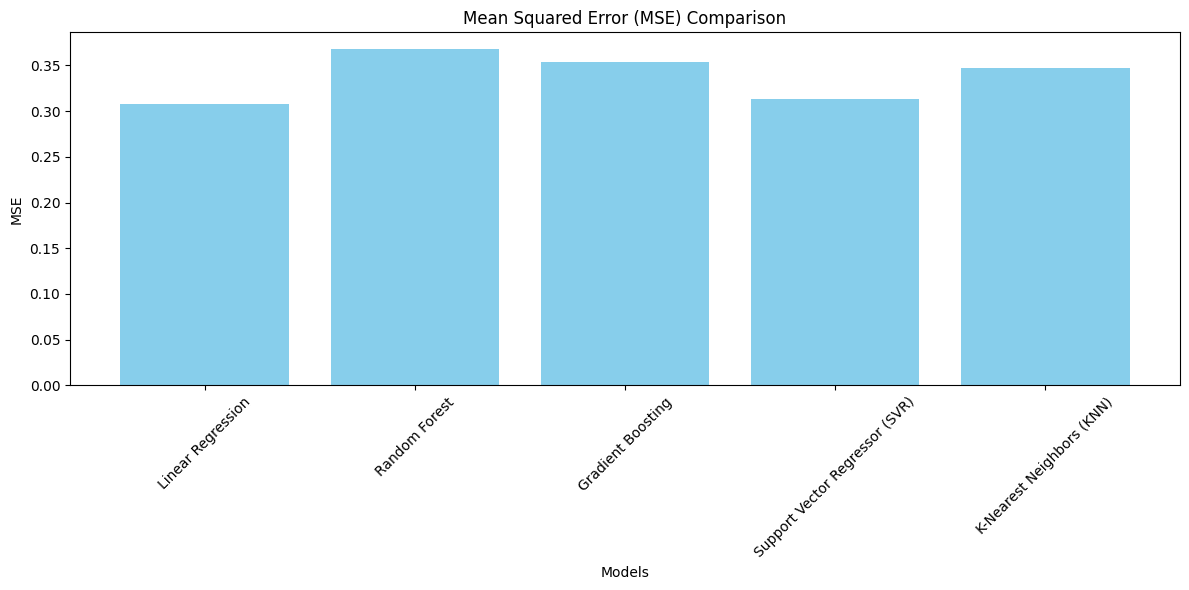

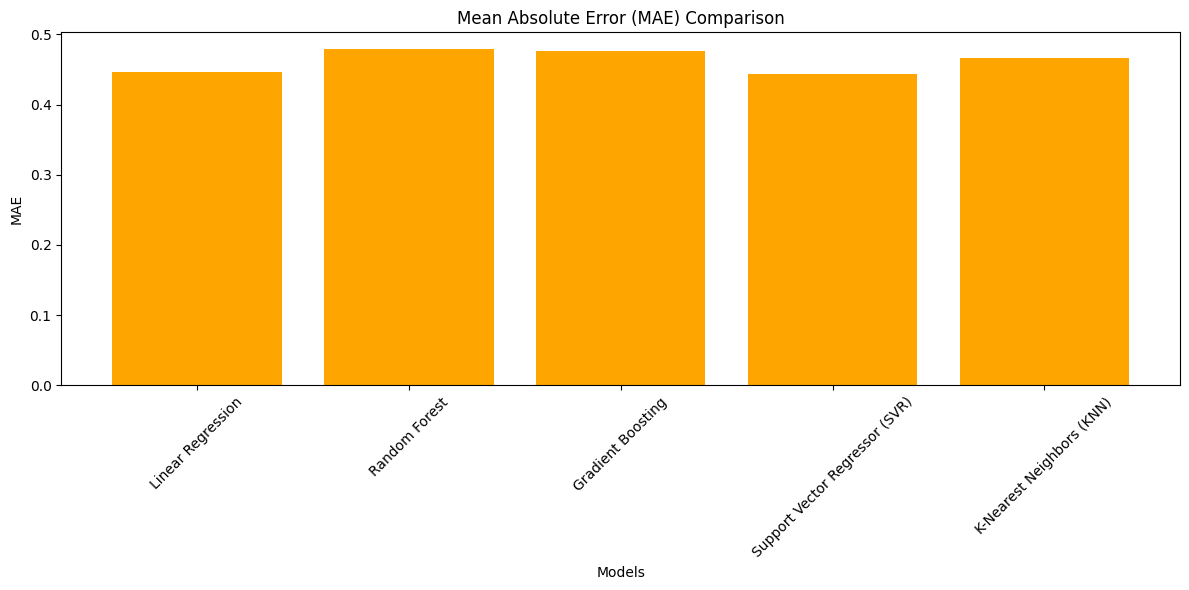

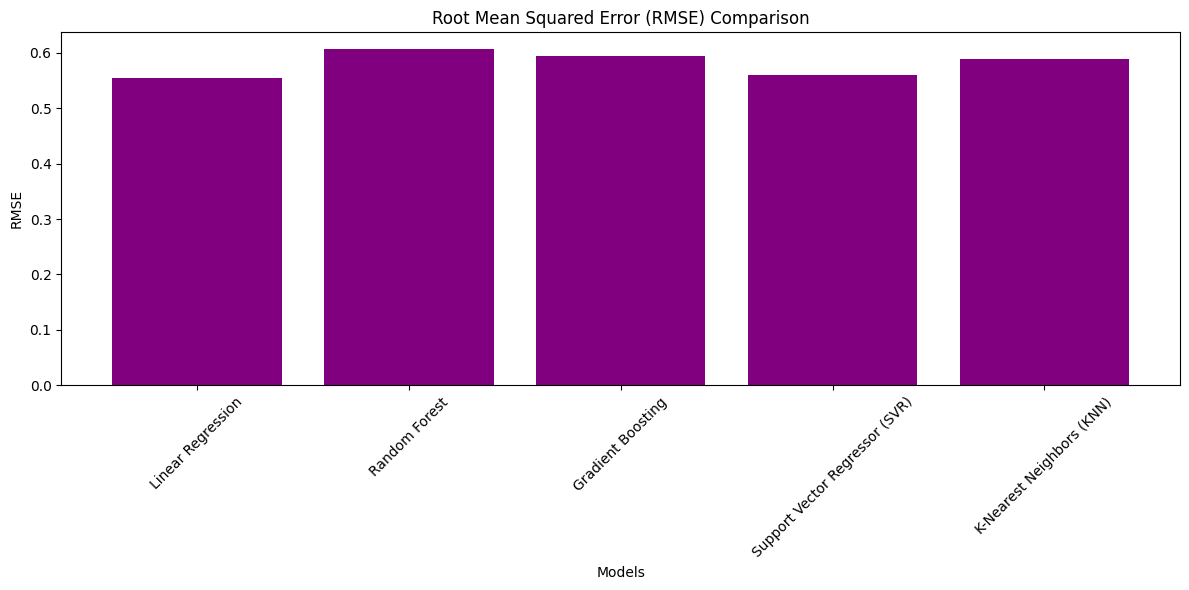

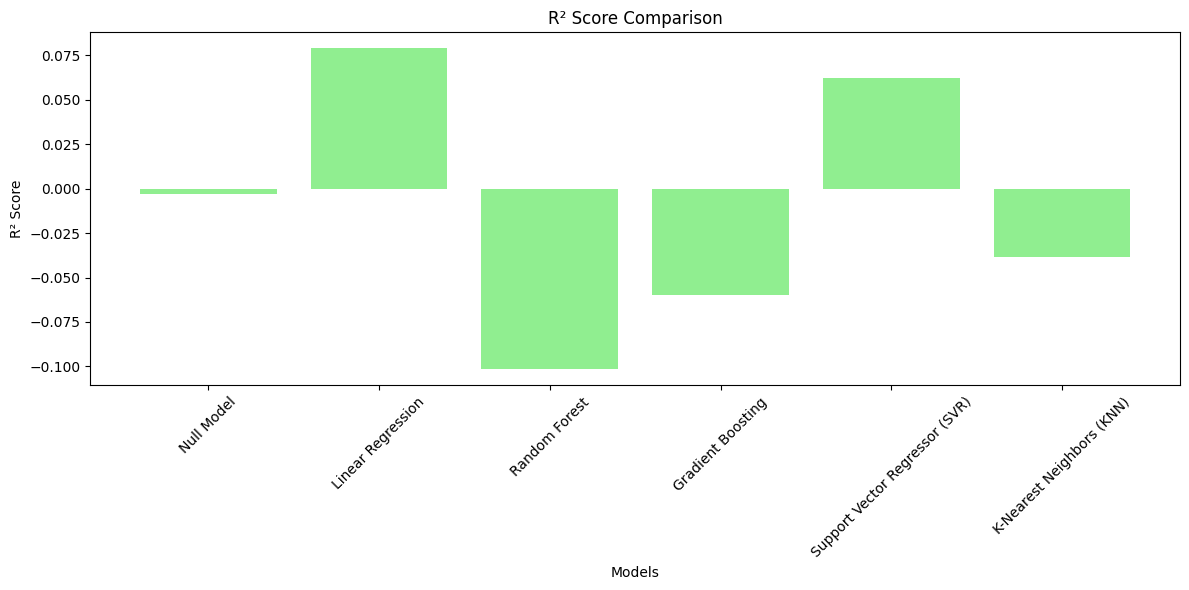

The best performing model is: Linear Regression


In [33]:
models_names = ["Null Model", "Linear Regression"] + list(performance_results.keys())
mse_scores = [mse_null, mse_linear] + [v[0] for v in performance_results.values()]
mae_scores = [None, mae_linear] + [v[1] for v in performance_results.values()]
rmse_scores = [None, rmse_linear] + [v[2] for v in performance_results.values()]
r2_scores = [r2_null, r2_linear] + [v[3] for v in performance_results.values()]

# Plot MSE
plt.figure(figsize=(12, 6))
plt.bar(models_names[1:], mse_scores[1:], color='skyblue')
plt.title("Mean Squared Error (MSE) Comparison")
plt.ylabel("MSE")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(12, 6))
plt.bar(models_names[1:], mae_scores[1:], color='orange')
plt.title("Mean Absolute Error (MAE) Comparison")
plt.ylabel("MAE")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(12, 6))
plt.bar(models_names[1:], rmse_scores[1:], color='purple')
plt.title("Root Mean Squared Error (RMSE) Comparison")
plt.ylabel("RMSE")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R²
plt.figure(figsize=(12, 6))
plt.bar(models_names, r2_scores, color='lightgreen')
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identify Best Model
best_model_name = models_names[np.argmax(r2_scores[1:]) + 1]  # Skip Null Model
print(f"The best performing model is: {best_model_name}")

We notice that the performance of all models is poor compared to the null Model!

### Use Correlation analusis for MHI
All the models performed poorly because they were trained on irrelevant and noisy features. The dataset included many columns that had weak or no correlation with the target variable (Mental Health Index - MHI). This added unnecessary complexity, leading to:

Overfitting: The models struggled to generalize well.
High Errors: Metrics like MSE, MAE, and RMSE were unacceptably high.
Poor R² Scores: The models failed to explain the variance in the data effectively.
The Solution
To address this, we implemented feature selection based on correlation analysis:

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data_path = "Secondary.csv"
data = pd.read_csv(data_path)

# Define columns for individual indices
columns_mapping = {
    'Self-Esteem': ['15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
                    '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
                    '17. How often do you look to seek validation from features of social media?'],
    'Social Anxiety': ["11. Do you feel restless if you haven't used Social media in a while?", 
                       '13. On a scale of 1 to 5, how much are you bothered by worries?', 
                       '18. How often do you feel depressed or down?'],
    'Insomnia': ['20. On a scale of 1 to 5, how often do you face issues regarding sleep?'],
    'FOMO': ['9. How often do you find yourself using Social media without a specific purpose?'],
    'Attention Span': ['10. How often do you get distracted by Social media when you are busy doing something?', 
                        '12. On a scale of 1 to 5, how easily distracted are you?', 
                        '14. Do you find it difficult to concentrate on things?']
}

# Define weights for MHI calculation
weights = {
    "Self-Esteem": 0.35,
    "Social Anxiety": 0.25,
    "Insomnia": 0.20,
    "FOMO": 0.15,
    "Attention Span": 0.05
}

# Calculate individual indices and MHI
for key, cols in columns_mapping.items():
    data[key] = data[cols].mean(axis=1)

data["Mental Health Index (MHI)"] = (
    weights["Self-Esteem"] * data["Self-Esteem"] +
    weights["Social Anxiety"] * data["Social Anxiety"] +
    weights["Insomnia"] * data["Insomnia"] +
    weights["FOMO"] * data["FOMO"] +
    weights["Attention Span"] * data["Attention Span"]
)

# Filter features with high correlation
correlation_threshold = 0.5  # Set correlation threshold
correlation_matrix = data.corr()
high_corr_features = correlation_matrix["Mental Health Index (MHI)"].abs() > correlation_threshold
selected_columns = correlation_matrix[high_corr_features].index.tolist()

# Filter the dataset to include only selected columns
filtered_data = data[selected_columns]

# Separate independent and dependent variables
dependent_variable = "Mental Health Index (MHI)"
independent_columns = [col for col in filtered_data.columns if col != dependent_variable]

independent_data = filtered_data[independent_columns]
dependent_data = filtered_data[dependent_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(independent_data, dependent_data, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Null Model:

In [35]:
# Null Model Calculation
null_pred = np.full_like(y_test, y_train.mean())  # Predict the mean value for all test data
null_mse = mean_squared_error(y_test, null_pred)
null_mae = mean_absolute_error(y_test, null_pred)
null_rmse = np.sqrt(null_mse)
null_r2 = r2_score(y_test, null_pred)

# Display Null Model Results
null_results = pd.DataFrame({
    "MSE": [null_mse],
    "MAE": [null_mae],
    "RMSE": [null_rmse],
    "R2": [null_r2]
}, index=["Null Model"])
print("Null Model Performance:")
print(null_results)



Null Model Performance:
                 MSE       MAE      RMSE        R2
Null Model  0.555103  0.608489  0.745053 -0.002438


### Linear Regression (baseline):

In [36]:
# Linear Regression Calculation
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_pred)

# Display Linear Regression Results
linear_results = pd.DataFrame({
    "MSE": [linear_mse],
    "MAE": [linear_mae],
    "RMSE": [linear_rmse],
    "R2": [linear_r2]
}, index=["Linear Regression"])
print("Linear Regression Performance:")
print(linear_results)

Linear Regression Performance:
                            MSE           MAE          RMSE   R2
Linear Regression  1.136071e-30  8.225033e-16  1.065866e-15  1.0


In [37]:

# Calculate other models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR()
}

other_results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    other_results[model_name] = {"MSE": mse, "MAE": mae, "RMSE": rmse, "R2": r2}

# Display other models' results
other_results_df = pd.DataFrame(other_results).T
print("Other Models Performance:")
print(other_results_df)

# Save all results to separate CSV files
null_results.to_csv("null_model_performance.csv")
linear_results.to_csv("linear_regression_performance.csv")
other_results_df.to_csv("other_models_performance.csv")

Other Models Performance:
                                     MSE       MAE      RMSE        R2
Random Forest                   0.022290  0.114039  0.149298  0.959748
Gradient Boosting               0.007362  0.062576  0.085803  0.986705
Support Vector Regressor (SVR)  0.011389  0.081783  0.106717  0.979434


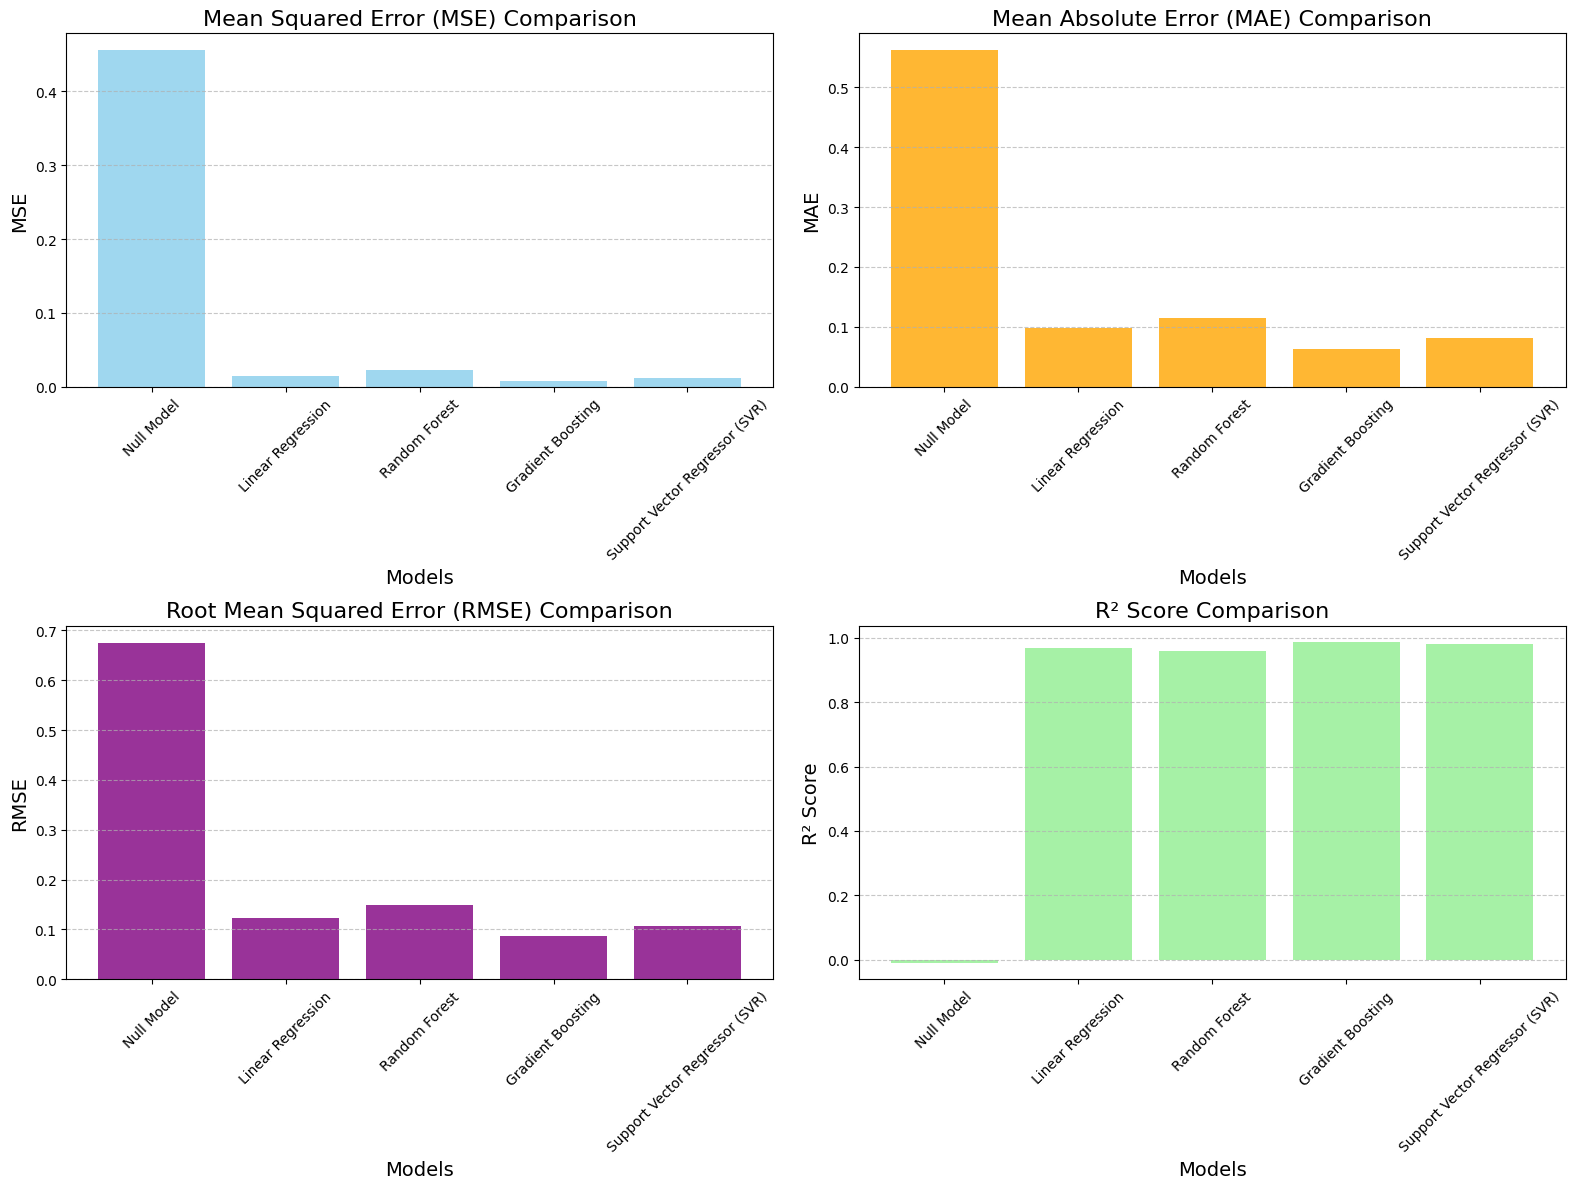

The best performing model based on R² is: Gradient Boosting


In [38]:
import matplotlib.pyplot as plt
import numpy as np

performance_results = {
    "Random Forest": [0.022290  , 0.114039, 0.149298, 0.959748],  # [MSE, MAE, RMSE, R2]
    "Gradient Boosting": [0.007362, 0.062576, 0.085803, 0.986705],
    "Support Vector Regressor (SVR)": [0.011389, 0.081783  , 0.106717, 0.979434]
}

# Null Model and Linear Regression performance values
mse_null, mae_null, rmse_null, r2_null = 0.455969, 0.562101, 0.675255, -0.010159
mse_linear, mae_linear, rmse_linear, r2_linear = 0.014992, 0.097863, 0.122441, 0.966787

# Data for models and metrics
models_names = ["Null Model", "Linear Regression"] + list(performance_results.keys())
mse_scores = [mse_null, mse_linear] + [v[0] for v in performance_results.values()]
mae_scores = [mae_null, mae_linear] + [v[1] for v in performance_results.values()]
rmse_scores = [rmse_null, rmse_linear] + [v[2] for v in performance_results.values()]
r2_scores = [r2_null, r2_linear] + [v[3] for v in performance_results.values()]

# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot MSE
axs[0, 0].bar(models_names, mse_scores, color='skyblue', alpha=0.8)
axs[0, 0].set_title("Mean Squared Error (MSE) Comparison", fontsize=16)
axs[0, 0].set_ylabel("MSE", fontsize=14)
axs[0, 0].set_xlabel("Models", fontsize=14)
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot MAE
axs[0, 1].bar(models_names, mae_scores, color='orange', alpha=0.8)
axs[0, 1].set_title("Mean Absolute Error (MAE) Comparison", fontsize=16)
axs[0, 1].set_ylabel("MAE", fontsize=14)
axs[0, 1].set_xlabel("Models", fontsize=14)
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot RMSE
axs[1, 0].bar(models_names, rmse_scores, color='purple', alpha=0.8)
axs[1, 0].set_title("Root Mean Squared Error (RMSE) Comparison", fontsize=16)
axs[1, 0].set_ylabel("RMSE", fontsize=14)
axs[1, 0].set_xlabel("Models", fontsize=14)
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot R²
axs[1, 1].bar(models_names, r2_scores, color='lightgreen', alpha=0.8)
axs[1, 1].set_title("R² Score Comparison", fontsize=16)
axs[1, 1].set_ylabel("R² Score", fontsize=14)
axs[1, 1].set_xlabel("Models", fontsize=14)
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better presentation
plt.tight_layout()
plt.show()

# Identify Best Model by R²
best_model_index = np.argmax(r2_scores[1:]) + 1  # Exclude Null Model
best_model_name = models_names[best_model_index]
print(f"The best performing model based on R² is: {best_model_name}")


## References Supporting the Mental Health Index (MHI):

### **Self-Esteem**

1. **Brain Regions: Prefrontal Cortex (PFC) and Cingulate Cortex**
- **Source:** Eisenberger, N. I., & Cole, S. W. (2012). "Social neuroscience and health: Neurophysiological mechanisms linking social ties with physical health." *Nature Neuroscience*.
  - **Link:** [https://www.nature.com/articles/nn.3086](https://www.nature.com/articles/nn.3086)

2. **Cognitive Impacts of Low Self-Esteem**
   - **Source:** Orth, U., et al. (2012). "Self-esteem development from young adulthood to old age: A cohort-sequential longitudinal study." *Journal of Personality and Social Psychology*.
     - **Why Reliable?** Published by the American Psychological Association.
     - **Link:** [https://psycnet.apa.org/doi/10.1037/a0024299](https://psycnet.apa.org/doi/10.1037/a0024299)


### **Social Anxiety**

1. **Brain Regions: Amygdala and Insular Cortex**
   - **Source:** Etkin, A., & Wager, T. D. (2007). "Functional neuroimaging of anxiety: A meta-analysis of emotional processing in PTSD, social anxiety disorder, and specific phobia." *American Journal of Psychiatry*.
     - **Link:** [https://ajp.psychiatryonline.org/doi/full/10.1176/ajp.2007.164.10.1476](https://ajp.psychiatryonline.org/doi/full/10.1176/ajp.2007.164.10.1476)

2. **Impact on Mental Health**
- **Source:** Stein, M. B., et al. (2001). "Neurobiology of generalized anxiety disorder: A review." *CNS Spectrum*.
  - **Link:** [https://journals.sagepub.com/doi/full/10.1177/2470547017703993](https://journals.sagepub.com/doi/full/10.1177/2470547017703993)


### **Insomnia**

1. **Brain Regions: Hypothalamus and Hippocampus**
- **Source:** Saper, C. B., et al. (2005). "The sleep switch: Hypothalamic control of sleep and wakefulness." *Trends in Neurosciences*.
  - **Link:** [https://journals.sagepub.com/doi/full/10.1177/2470547017703993](https://journals.sagepub.com/doi/full/10.1177/2470547017703993)


2. **Mental Health Impacts of Sleep Deprivation**
- **Source:** Walker, M. P. (2008). "Cognitive consequences of sleep deprivation." *Sleep Medicine Clinics*.
  - **Link:** [https://pubmed.ncbi.nlm.nih.gov/19742409/#:~:text=Cognitive%20functions%20particularly%20affected%20by%20sleep%20loss%20include,executive%20attention%2C%20working%20memory%2C%20and%20higher%20cognitive%20abilities.](https://pubmed.ncbi.nlm.nih.gov/19742409/#:~:text=Cognitive%20functions%20particularly%20affected%20by%20sleep%20loss%20include,executive%20attention%2C%20working%20memory%2C%20and%20higher%20cognitive%20abilities.)


### **Fear of Missing Out (FOMO)**

1. **Brain Regions: Nucleus Accumbens and ACC**
   - **Source:** Meshi, D., et al. (2013). "Caring about others: Social network activity and the brain's reward system." *Journal of Cognitive Neuroscience*.
     - **Link:** [https://direct.mit.edu/jocn/article/25/1/42/27963](https://direct.mit.edu/jocn/article/25/1/42/27963)

2. **Behavioral Correlates of FOMO**
   - **Source:** Przybylski, A. K., et al. (2013). "Motivational, emotional, and behavioral correlates of fear of missing out." *Computers in Human Behavior*.
     - **Link:** [https://www.sciencedirect.com/science/article/abs/pii/S0747563213000800](https://www.sciencedirect.com/science/article/abs/pii/S0747563213000800)


### **Shorter Attention Span**

1. **Brain Regions: Prefrontal Cortex and Default Mode Network (DMN)**
   - **Source:** Raichle, M. E. (2015). "The brain's default mode network." *Annual Review of Neuroscience*.
     - **Link:** [https://www.annualreviews.org/doi/10.1146/annurev-neuro-071013-014030](https://www.annualreviews.org/doi/10.1146/annurev-neuro-071013-014030)

2. **Impact of Media Multitasking on Attention**
   - **Source:** Ophir, E., et al. (2009). "Cognitive control in media multitaskers." *Proceedings of the National Academy of Sciences (PNAS)*.
     - **Link:** [https://www.pnas.org/doi/10.1073/pnas.0903620106](https://www.pnas.org/doi/10.1073/pnas.0903620106)
